## Libraries

In [1]:
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

import matplotlib.pyplot as plt


2025-01-25 18:31:56.941338: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-25 18:31:56.947626: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-25 18:31:56.965358: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737826316.992883   21532 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737826317.000727   21532 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-25 18:31:57.027597: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

## Import data

In [2]:
# !wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


## Task



In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.


##  My contribution

### Convert categorical data to numbers

In [3]:
# Create lists of unique values of each categorical column
sexes   = [sex    for sex    in dataset['sex'].unique()   ]
smokers = [smoker for smoker in dataset['smoker'].unique()]
regions = [region for region in dataset['region'].unique()]

In [4]:
# Create a dictionary of map assigning a unique value for each unique category of each categorical column
sexes_map   = {sex    : sexes.index(sex)      for sex    in sexes  }
smokers_map = {smoker : smokers.index(smoker) for smoker in smokers}
regions_map = {region : regions.index(region) for region in regions}

In [5]:
# Assigning the new values in te dataset
dataset['sex'   ] = dataset['sex'].map(sexes_map)
dataset['smoker'] = dataset['smoker'].map(smokers_map)
dataset['region'] = dataset['region'].map(regions_map)

### Normalize the uncategorical data

In [6]:
# Normalize the numerical columns
max_age      = dataset['age'].max()
max_bmi      = dataset['bmi'].max()
max_children = dataset['children'].max()

In [7]:
# Normalize age and bmi
dataset['age']      = dataset['age'] / max_age
dataset['bmi']      = dataset['bmi'] / max_bmi
dataset['children'] = dataset['children'] / max_children

### Split the data

In [8]:
# Split into train and test datasets
train_dataset = dataset[:round(len(dataset)*0.8)]
test_dataset  = dataset[round(len(dataset)*0.8):]

In [9]:
# Separate features and labels
train_labels = train_dataset.pop('expenses')
test_labels  = test_dataset.pop('expenses')

### Build the model

In [10]:
# Define the model
model = keras.models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(train_dataset.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

/home/ocr8n/Documents/GitHub/FreeCodeCamp/Python - Machine Learning/Validation Projects/Health Care/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-25 18:31:59.824536: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='mae', 
              metrics=['mae', 'mse']) 


In [12]:
# Train the model
history = model.fit(
    train_dataset, train_labels,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 13684.3838 - mae: 13684.3838 - mse: 344186560.0000 - val_loss: 13262.9443 - val_mae: 13262.9443 - val_mse: 314140192.0000
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13362.7275 - mae: 13362.7275 - mse: 326145792.0000 - val_loss: 13246.1064 - val_mae: 13246.1064 - val_mse: 313698336.0000
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13069.4697 - mae: 13069.4697 - mse: 311247072.0000 - val_loss: 13156.9248 - val_mae: 13156.9248 - val_mse: 311375392.0000
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12590.2305 - mae: 12590.2305 - mse: 295232224.0000 - val_loss: 12845.0293 - val_mae: 12845.0293 - val_mse: 303393184.0000
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12455.3574 - mae: 12455.3574 - mse: 294139168.0000 - val_loss: 12028.9961 - val_mae: 12028.9961 - val_mse: 283490368.0000
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11590.8135 - mae: 11590.8135 - mse:

## Test Cells

9/9 - 0s - 9ms/step - loss: 3108.6272 - mae: 3108.6272 - mse: 39288612.0000
Testing set Mean Abs Error: 3108.63 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


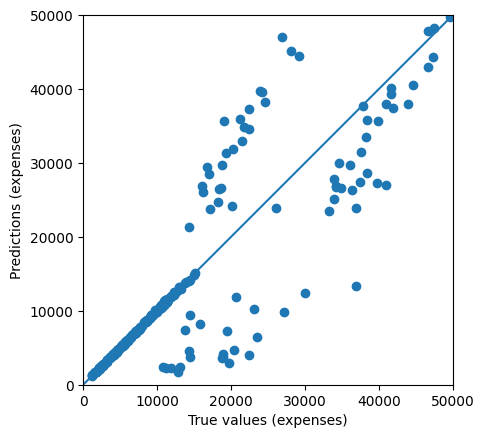

In [13]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
